# 第六章

### 图6-12 传播结构图

In [3]:
from treelib import Node, Tree #若错报，不存在treelib模块，使用命令pip install treelib安装即可
import networkx as nx
import pickle
import matplotlib.pyplot as plt

tree_3793992191673761 = pickle.load(open('tree_3793992191673761.pkl',  "rb"))
tree_name=tree_3793992191673761
all_nodes = list(tree_name.nodes)    
all_edges = []
for node_i in all_nodes:
    son_list = tree_name.is_branch(node_i) #获取子节点
    if len(son_list)>0:
        for node_j in son_list:
            all_edges.append((node_i,node_j))
            
G = nx.Graph()
G.add_edges_from(all_edges)
root_node = tree_name.root #根节点

fig = plt.gcf() 
fig.set_size_inches(10, 10)

#pos = graphviz_layout(G, prog='twopi', args='')
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=100, alpha=0.6, node_color="blue", with_labels=False)
nx.draw_networkx_nodes(G, pos, nodelist=[root_node], node_size=300, node_color='r')
plt.show()

### 图6-13 发微博节点的特征重要性

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

# 特征重要性排序
def draw_plot_importance(scale_importance, depth_importance, feature_namesX):

#scale_importance: 预测规模时，特征的重要性分数
#depth_importance: 预测深度时，特征的重要性分数
#feature_namesX: 该类别特征名字的列表

    for row in [35]: #后期
        print('it is plotting ','T'+str(scale_importance['scaleT'][row]))
        scale_dict = {}
        depth_dict = {}
        for name in feature_namesX:
            try:
                scale_dict[name] = scale_importance[name][row]
            except:
                pass
            try:
                depth_dict[name] = depth_importance[name][row]
            except:
                pass
        sorted_scale = sorted(scale_dict.items(),key=lambda item:item[1],reverse=True)#根据键值进行排序
        sorted_depth = sorted(depth_dict.items(),key=lambda item:item[1],reverse=True)
        
        #分数，特征也按照从大到小的顺序进行
        sorted_scale_feature = []
        sorted_scale_fscore  = []
        for tup in sorted_scale:
            sorted_scale_feature.append(tup[0])
            sorted_scale_fscore.append(tup[1])
        sorted_depth_feature = []
        sorted_depth_fscore  = []
        for tup in sorted_depth:
            sorted_depth_feature.append(tup[0])
            sorted_depth_fscore.append(tup[1])
        plt.rcParams["ytick.color"] = 'black'
        plt.rcParams["xtick.color"] = 'black'
        plt.rcParams.update({'text.color': 'black'})
       #scale
        plt.subplots(figsize=(18,6))
        plt.subplot(1,2,1)
        plt.bar(range(len(sorted_scale_feature)), sorted_scale_fscore,color='royalblue')
        plt.title('Scale',fontsize=22)
        plt.ylabel('Fscore',fontsize=22)
        plt.yticks(fontsize=22)
        plt.xticks(range(len(sorted_scale_feature)),sorted_scale_feature,fontsize=22)
        plt.xticks(rotation = 90)
        #设置数字标签
        for a,b in zip(range(len(sorted_scale_feature)),sorted_scale_fscore):    
             plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)      
        #depth
        plt.subplot(1,2,2)
        plt.bar(range(len(sorted_depth_feature)), sorted_depth_fscore,)
        plt.title('Depth',fontsize=22)
        plt.ylabel('Fscore',fontsize=22)
        plt.yticks(fontsize=22)
        plt.xticks(range(len(sorted_depth_feature)),sorted_depth_feature,fontsize=22)       
        plt.xticks(rotation = 90)
        #设置数字标签
        for a,b in zip(range(len(sorted_depth_feature)),sorted_depth_fscore):    
             plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
        plt.show()

In [5]:
scale_importance = pd.read_csv('1_scale_importance.csv')
depth_importance = pd.read_csv('1_depth_importance.csv')
feature_names1 = [ 'out_degree1', 'in_degree1','all_degree1','bi_degree1','pagerank1']
draw_plot_importance(scale_importance, depth_importance, feature_names1)

('it is plotting ', 'T4275')


### 图6-14  基于最大信息系数计算得到的网络特征量相关关系

In [7]:
import seaborn as sns #若错报，不存在seaborn模块，使用命令pip install seaborn安装即可

df1 = np.loadtxt('MIC_first_features.txt')
#画图
plt.rcParams["ytick.color"] = 'black'
plt.rcParams["xtick.color"] = 'black' 
plt.rcParams.update({'text.color': 'black'})
f,ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=2)#设置字体大小
sns.heatmap(df1,ax=ax,cmap='Blues',annot=True)
ax.set_xticklabels(('pagerank1', 'in_degree1', 'all_degree1', 'out_degree1','bi_degree1'))
ax.set_yticklabels(('bi_degree1', 'out_degree1', 'all_degree1', 'in_degree1', 'pagerank1'))
plt.yticks(rotation =360)
plt.xticks(rotation = 90)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout() 
plt.show()

ImportError: No module named seaborn

###  图6-15 影响微博信息流行度的微博文本特征量排序

In [101]:
import pandas as pd 
import matplotlib.pyplot as plt

# 特征重要性排序
def draw_plot_importance(scale_importance, depth_importance, feature_namesX):

#scale_importance: 预测规模时，特征的重要性分数
#depth_importance: 预测深度时，特征的重要性分数
#feature_namesX: 该类别特征名字的列表

    for row in [35]: #后期
        print('it is plotting ','T'+str(scale_importance['scaleT'][row]))
        scale_dict = {}
        depth_dict = {}
        for name in feature_namesX:
            try:
                scale_dict[name] = scale_importance[name][row]
            except:
                pass
            try:
                depth_dict[name] = depth_importance[name][row]
            except:
                pass
        sorted_scale = sorted(scale_dict.items(),key=lambda item:item[1],reverse=True)#根据键值进行排序
        sorted_depth = sorted(depth_dict.items(),key=lambda item:item[1],reverse=True)
        
        #分数，特征也按照从大到小的顺序进行
        sorted_scale_feature = []
        sorted_scale_fscore  = []
        for tup in sorted_scale:
            sorted_scale_feature.append(tup[0])
            sorted_scale_fscore.append(tup[1])
        sorted_depth_feature = []
        sorted_depth_fscore  = []
        for tup in sorted_depth:
            sorted_depth_feature.append(tup[0])
            sorted_depth_fscore.append(tup[1])
        #设置字体和xtick,ytick.
        plt.rcParams["ytick.color"] = 'black'
        plt.rcParams["xtick.color"] = 'black'
        plt.rcParams.update({'text.color': 'black'})
       #scale
        plt.subplots(figsize=(18,6))
        plt.subplot(1,2,1)
        plt.bar(range(len(sorted_scale_feature)), sorted_scale_fscore,color='royalblue')
        plt.title('Scale',fontsize=22)
        plt.ylabel('Fscore',fontsize=22)
        plt.yticks(fontsize=22)
        plt.xticks(range(len(sorted_scale_feature)),sorted_scale_feature,fontsize=22)
        plt.xticks(rotation = 90)
        #设置数字标签
        for a,b in zip(range(len(sorted_scale_feature)),sorted_scale_fscore):    
             plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)      
        #depth
        plt.subplot(1,2,2)
        plt.bar(range(len(sorted_depth_feature)), sorted_depth_fscore,)
        plt.title('Depth',fontsize=22)
        plt.ylabel('Fscore',fontsize=22)
        plt.yticks(fontsize=22)
        plt.xticks(range(len(sorted_depth_feature)),sorted_depth_feature,fontsize=22)       
        plt.xticks(rotation = 90)
        #设置数字标签
        for a,b in zip(range(len(sorted_depth_feature)),sorted_depth_fscore):    
             plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
        plt.show()

it is plotting  T4275


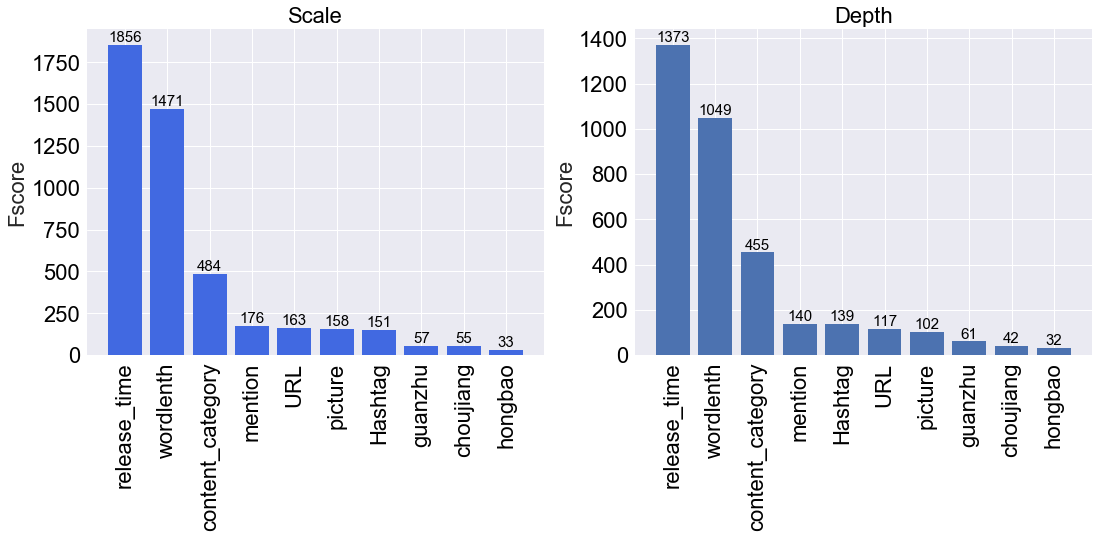

In [84]:
scale_importance = pd.read_csv('3_scale_importance.csv')
depth_importance = pd.read_csv('3_depth_importance.csv')

feature_names3 = ['release_time', 'wordlenth', 'URL','Hashtag','mention', 'picture', 'content_category', 'hongbao', 'guanzhu','choujiang']
draw_plot_importance(scale_importance, depth_importance, feature_names3)

### 图6-16 基于最大信息系数计算得到的文本特征量相关关系

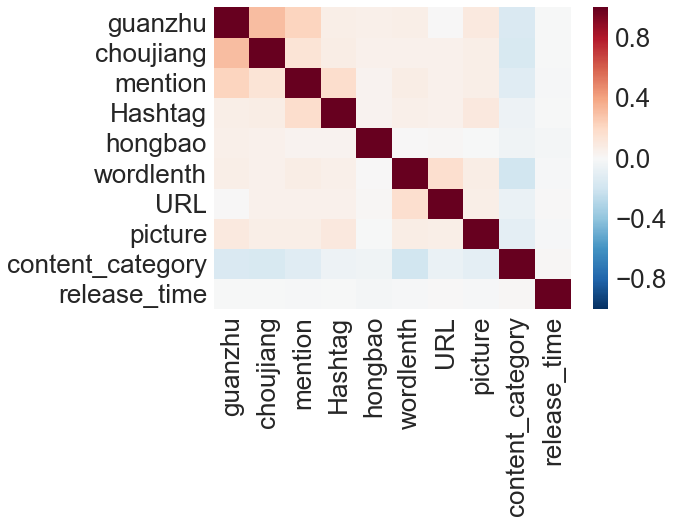

In [100]:
plt.subplots(figsize=(10,8))
final_data = pd.read_csv('WeiboProfile_train_final.csv')
L = ['guanzhu','choujiang','mention','Hashtag','hongbao','wordlenth','URL','picture','content_category','release_time']
sns.set(font_scale=2.6)
sns.heatmap(final_data[L].corr())
plt.yticks(rotation = 360)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 图6-17 信息流行度范围和深度预测的RMSE随时间变化曲线

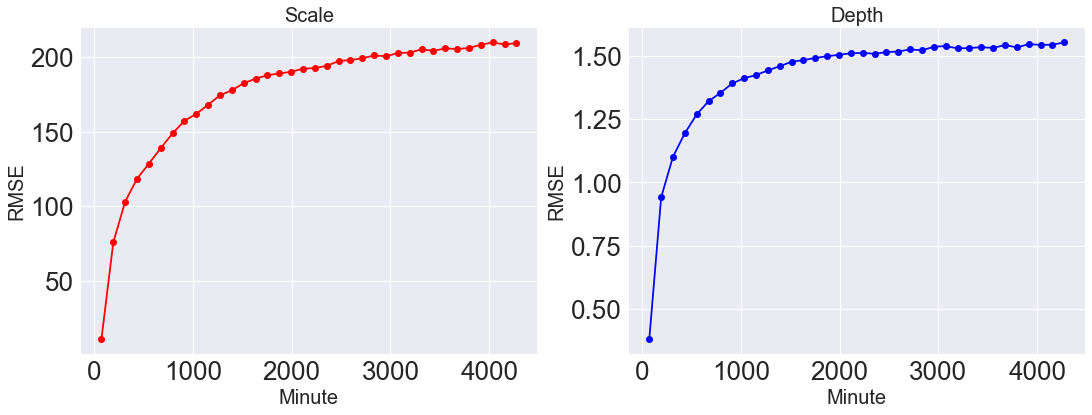

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

#RMSE
def RMSE(y_actual, y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    return rmse

scale_rmse20 = []
depth_rmse20 = []
pred_scale20 = pd.read_csv('20_scale_predict.csv')[['scaleT'+str(k) for k in range(75,4380,120)]]
true_scale20 = pd.read_csv('test2015.csv')[['scaleT'+str(i) for i in range(75,4380,120)]]
pred_depth20 = pd.read_csv('20_depth_predict.csv')[['depthT'+str(l) for l in range(75,4380,120)]]
true_depth20 = pd.read_csv('test2015.csv')[['depthT'+str(j) for j in range(75,4380,120)]]
for i in range(75,4380,120):
    pred_scale201 = list(pred_scale20['scaleT'+str(i)])
    true_scale201 = list(true_scale20['scaleT'+str(i)])
    pred_depth201 = list(pred_depth20['depthT'+str(i)])
    true_depth201 = list(true_depth20['depthT'+str(i)])
    scale_rmse20.append(RMSE(pred_scale201,true_scale201))
    depth_rmse20.append(RMSE(pred_depth201,true_depth201))

plt.subplots(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(range(75,4380,120),scale_rmse20,marker='o',color='r')
plt.xlabel('Minute',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
plt.title('Scale',fontsize=20)
plt.subplot(1,2,2)
plt.plot(range(75,4380,120),depth_rmse20,marker='o',color='b')
plt.xlabel('Minute',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
plt.title('Depth',fontsize=20)
plt.show()